# Data File Reading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
import random
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from math import e

In [2]:
url_stem = "https://raw.githubusercontent.com/gaminghusky1/DataScienceProject/main/"
lifestyle_df_raw = pd.read_csv(url_stem + "SleepHealthLifestyle.csv")
lifestyle_df = lifestyle_df_raw

In [3]:
lifestyle_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# Data Modifications
lifestyle_df["Sleep Disorder"] = lifestyle_df["Sleep Disorder"].fillna("None")
lifestyle_df["BMI Category"] = lifestyle_df["BMI Category"].replace("Normal Weight", "Normal")
lifestyle_df["Occupation"] = lifestyle_df["Occupation"].replace("Software Engineer", "Engineer")
lifestyle_df["Occupation"] = lifestyle_df["Occupation"].replace("Sales Representative", "Salesperson")
systolic = []
diastolic = []
for i in lifestyle_df["Blood Pressure"]:
  sys_dia_split = i.split('/')
  systolic.append(int(sys_dia_split[0]))
  diastolic.append(int(sys_dia_split[1]))
lifestyle_df["Systolic"] = pd.DataFrame(systolic)
lifestyle_df["Diastolic"] = pd.DataFrame(diastolic)
lifestyle_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


# Question 1
### What is the relationship between sleep duration, quality of sleep, and sleep disorders?

In [5]:
dur_qual_corr = lifestyle_df["Sleep Duration"].corr(lifestyle_df["Quality of Sleep"])
print(f"Correlation Coefficient of Sleep Duration and Quality of Sleep: {dur_qual_corr}")

Correlation Coefficient of Sleep Duration and Quality of Sleep: 0.8827168171068412


In [6]:
no_disorder = lifestyle_df[lifestyle_df["Sleep Disorder"]=="None"]
apnea = lifestyle_df[lifestyle_df["Sleep Disorder"]=="Sleep Apnea"]
insomnia = lifestyle_df[lifestyle_df["Sleep Disorder"]=="Insomnia"]

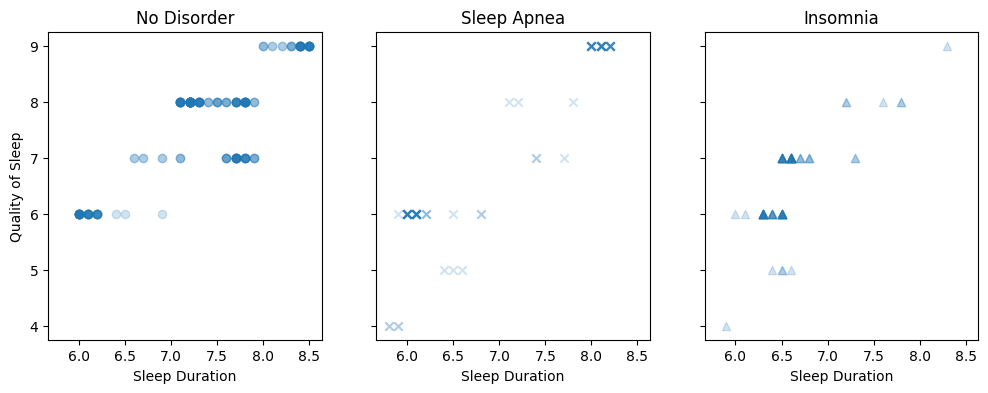

In [7]:
fig = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 4))
plt.subplot(1,3,1)
plt.xlabel("Sleep Duration")
plt.ylabel("Quality of Sleep")
plt.title("No Disorder")
plt.scatter(no_disorder["Sleep Duration"],no_disorder["Quality of Sleep"], alpha=0.2)
plt.subplot(1,3,2)
plt.xlabel("Sleep Duration")
plt.title("Sleep Apnea")
plt.scatter(apnea["Sleep Duration"],apnea["Quality of Sleep"], marker='x', alpha=0.2)
plt.subplot(1,3,3)
plt.xlabel("Sleep Duration")
plt.title("Insomnia")
plt.scatter(insomnia["Sleep Duration"],insomnia["Quality of Sleep"], marker='^', alpha=0.2)
plt.show()

In [8]:
col_transformer = make_column_transformer(
    (StandardScaler(), ['Sleep Duration','Quality of Sleep']),
    remainder='drop'
)

disorder_pipeline = make_pipeline(
    col_transformer,
    KMeans(n_clusters=3, init='k-means++',n_init='auto')
)
disorder_pipeline.fit(lifestyle_df)
clusters = disorder_pipeline['kmeans'].labels_

In [9]:
disorder_pipeline['kmeans'].cluster_centers_

array([[ 0.41706019,  0.35045348],
       [-1.05201089, -0.99193532],
       [ 1.40569482,  1.41711546]])

In [10]:
temp_lsdf = lifestyle_df.copy()
temp_lsdf["Cluster"]=pd.DataFrame(clusters)
pd.crosstab(temp_lsdf["Sleep Disorder"],temp_lsdf["Cluster"]).T

Sleep Disorder,Insomnia,None,Sleep Apnea
Cluster,,,
0,7,137,6
1,69,44,40
2,1,38,31


### Evaluation
We can see that sleep duration and quality of sleep are pretty strongly correlated, with a correlation coefficient of ~0.88. Because of this, for the following questions, we will use quality of sleep as the feature to evaluate our predictive models.

From the plots, we can see that if you don't have a sleep disorder, your quality of sleep is 6 or above, but if you do have a sleep disorder, you can have a quality of sleep as low as 4. This makes sense, because people with sleep disorders often have trouble sleeping or frequent interruptions in the nighttime, which may decrease quality of sleep.

From the clustering model we created, we can see that there are no clear clusters we can evaluate from sleep duration and quality of sleep. Looking at the distributions of sleep disorders over the modeled clusters, we can see that they are pretty spread out. This makes sense because, looking at the plots, even people with sleep disorders may have good quality of sleep and high sleep duration (likely due to medical treatments to improve these disorders). This also shows that other external factors have an impact on your sleep habits, which we will evaluate in the following questions.

# Question 2
### What are the effects of a person’s age, gender, and occupation on their sleep duration and quality of sleep?

### Do these factors (age, gender, and occupation) have a strong influence on sleep disorders?

### Are there any features that can predict these outputs?

In [11]:
male = lifestyle_df[lifestyle_df["Gender"]=="Male"]
female = lifestyle_df[lifestyle_df["Gender"]=="Female"]

To better visualize the plot, we need to spread out (a.k.a. jitter) the scatter plot a little to minimize overlap without significantly changing the content of the data.

In [12]:
male_jitter = random.sample(range(100, 500), len(male))
male_jitter = pd.Series(male_jitter, index=male.index)/10000

In [13]:
female_jitter = random.sample(range(100, 500), len(female))
female_jitter = pd.Series(female_jitter, index=female.index)/10000

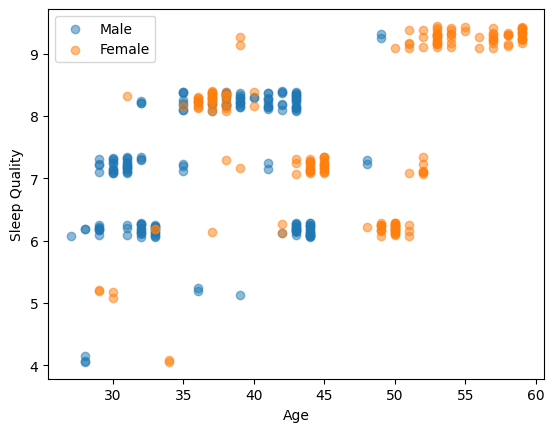

In [14]:
plt.figure()
plt.scatter(male["Age"], male["Quality of Sleep"]*(1+male_jitter), label='Male', alpha=0.5)
plt.scatter(female["Age"], female["Quality of Sleep"]*(1+female_jitter), label='Female', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()

In [15]:
pd.crosstab(lifestyle_df["Occupation"],lifestyle_df["Quality of Sleep"])

Quality of Sleep,4,5,6,7,8,9
Occupation,,,,,,
Accountant,0,0,0,6,29,2
Doctor,0,0,33,34,0,4
Engineer,1,1,2,1,30,32
Lawyer,0,0,0,5,42,0
Manager,0,0,0,1,0,0
Nurse,0,4,33,1,2,32
Salesperson,2,0,32,0,0,0
Scientist,2,0,2,0,0,0
Teacher,0,2,3,29,6,0


In [16]:
pd.crosstab(lifestyle_df["Occupation"],lifestyle_df["Sleep Disorder"])

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,7,30,0
Doctor,3,64,4
Engineer,6,60,1
Lawyer,2,42,3
Manager,0,1,0
Nurse,3,9,60
Salesperson,29,2,3
Scientist,0,2,2
Teacher,27,9,4


**Evaluation**

From the plot, we can see that there are a large number of older women that have very good quality of sleep and a large chunk of people between 35-45 that have good sleep quality. What is surprising is that there younger people tend to have worse sleep quality than older people.

From our analysis of occupation, we can see that lawyers and engineers tend to have better sleep quality than others, and salespersons, teachers, and doctors tend to have mediocre sleep quality. We can also see that nurses tend to have sleep apnea, and salespersons and teachers tend to have insomnia.

We will be removing scientists and managers from our future data analysis due to their small size in our data.

In [17]:
new_lifestyle_df = lifestyle_df[(lifestyle_df["Occupation"]!="Scientist")&(lifestyle_df["Occupation"]!="Manager")]

In [18]:
col_lrtransformer = make_column_transformer(
    (StandardScaler(), ["Age"]),
    (OneHotEncoder(), ["Gender", "Occupation"]),
    remainder = 'drop'
)
pipelinelr_quality = make_pipeline(
    col_lrtransformer,
    LinearRegression()
)

pipelinelr_quality.fit(new_lifestyle_df, new_lifestyle_df["Quality of Sleep"])
coefs = pipelinelr_quality['linearregression'].coef_
intercept = pipelinelr_quality['linearregression'].intercept_

print(f'Coefficients: {coefs}')
print(f'Intercept: {intercept}')

Coefficients: [ 0.75177894  0.04817493 -0.04817493  0.76816366  0.21960905  0.69602125
  0.87659875 -0.82971342 -1.40835015 -0.32232913]
Intercept: 7.304756313867314


In [19]:
pipelinelr_quality[:1].get_feature_names_out()

array(['standardscaler__Age', 'onehotencoder__Gender_Female',
       'onehotencoder__Gender_Male',
       'onehotencoder__Occupation_Accountant',
       'onehotencoder__Occupation_Doctor',
       'onehotencoder__Occupation_Engineer',
       'onehotencoder__Occupation_Lawyer',
       'onehotencoder__Occupation_Nurse',
       'onehotencoder__Occupation_Salesperson',
       'onehotencoder__Occupation_Teacher'], dtype=object)

**Evaluation**

Looking at the coefficients of the linear regression model, the first one (corresponding to age) is a higher value, which shows that it has a large impact on quality of sleep. Gender does not have much impact on quality of sleep because their coefficients are very small. The impact on quality of sleep for each occupation can be shown by the last 7 coefficients.
For example, -1.408 corresponds to salesperson, who generally have bad quality of sleep.

In [20]:
col_logtransformer = make_column_transformer(
    (StandardScaler(), ["Age"]),
    (OneHotEncoder(), ["Gender", "Occupation"]),
    remainder = 'drop'
)
pipelinelog_disorder = make_pipeline(
    col_lrtransformer,
    LogisticRegression()
)

pipelinelog_disorder.fit(new_lifestyle_df, new_lifestyle_df["Sleep Disorder"])

print(pipelinelog_disorder['logisticregression'].classes_)
print(pipelinelog_disorder['logisticregression'].coef_)
pipelinelog_disorder['logisticregression'].intercept_

['Insomnia' 'None' 'Sleep Apnea']
[[ 5.52715776e-01 -3.73386214e-01  3.73573734e-01  6.74455157e-01
  -7.03849439e-01 -4.58133616e-01 -9.35785768e-01 -1.21647896e+00
   1.25242003e+00  1.38756012e+00]
 [-7.10531082e-01  3.95846799e-01 -3.95319547e-01  2.80775236e-01
   7.03784755e-01  1.36534765e+00  1.02901711e+00 -9.12448530e-01
  -1.22618106e+00 -1.23976791e+00]
 [ 1.57815305e-01 -2.24605847e-02  2.17458122e-02 -9.55230392e-01
   6.46848843e-05 -9.07214032e-01 -9.32313428e-02  2.12892749e+00
  -2.62389732e-02 -1.47792209e-01]]


array([-0.1533607,  0.8676579, -0.7142972])

In [21]:
pipelinelog_disorder[:1].get_feature_names_out()

array(['standardscaler__Age', 'onehotencoder__Gender_Female',
       'onehotencoder__Gender_Male',
       'onehotencoder__Occupation_Accountant',
       'onehotencoder__Occupation_Doctor',
       'onehotencoder__Occupation_Engineer',
       'onehotencoder__Occupation_Lawyer',
       'onehotencoder__Occupation_Nurse',
       'onehotencoder__Occupation_Salesperson',
       'onehotencoder__Occupation_Teacher'], dtype=object)

**Evaluation**

To evaluate these results, we will be saying that any intercept with a magnitude of 1 or greater shows a strong impact on sleep disorder. The 3 elements in the array show the coefficients for each disorder type: insomnia, non, and sleep apnea respectively.

The one corresponding to insomnia shows that salespersons and teachers are often affected because they have positive coefficients greater than 1. It also shows a negative coefficient with a magnitude greater than 1, which shows that nurses will rarely suffer from insomnia. Similarly, we see in the second vector that engineers and lawyers are generally predicted to have no sleep disorder, while salespersons and teachers often do have a disorder. In the last vector, we see a large coefficient for nurses, showing that they often have sleep apnea. This information is consistent with our crosstabulation above.

# Question 3
### How does lifestyle (stress level, physical activity, and daily steps) and vital signs (BMI, blood pressure, and heart rate) influence quality of sleep?

### Can we provide suggestions to change one’s lifestyle habits to improve sleeping habits?

### Are these suggestions different for males and females?


To prevent overfitting our data, let's look at the correlation coefficients for each numeric feature in our list and eliminate one out of the two features that have a correlation coefficient of above magnitude 0.7.

In [22]:
lsvs_features = ["Stress Level", "Physical Activity Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
lifestyle_df[lsvs_features].corr()

,Stress Level,Physical Activity Level,Heart Rate,Daily Steps,Systolic,Diastolic
Stress Level,1.000000,-0.031490,0.670010,0.187697,0.108739,0.098493
Physical Activity Level,-0.031490,1.000000,0.138199,0.773105,0.263376,0.380962
Heart Rate,0.670010,0.138199,1.000000,-0.030161,0.297205,0.274601
Daily Steps,0.187697,0.773105,-0.030161,1.000000,0.103198,0.242400
Systolic,0.108739,0.263376,0.297205,0.103198,1.000000,0.972757
Diastolic,0.098493,0.380962,0.274601,0.242400,0.972757,1.000000


We can see that systolic and diastolic blood pressure are very strongly correlated, and so is physical activity and daily steps. For this reason, we can remove one feature from each of the above, so for this analysis, we will remove the features ```Daily Steps``` and ```Systolic```.


### **Male Analysis**

In [23]:
ls_ctransformer = make_column_transformer(
  (StandardScaler(), ["Stress Level", "Physical Activity Level", "Heart Rate", "Diastolic"]),
  (OneHotEncoder(handle_unknown='ignore'), ["BMI Category"]),
  remainder = 'drop'
)

ls_pipeline = make_pipeline(
    ls_ctransformer,
    LinearRegression()
)
# Male linear regression cross validation for quality of sleep
ls_scores_male = cross_validate(
    estimator = ls_pipeline,
    X = male,
    y = male["Quality of Sleep"],
    scoring = 'neg_root_mean_squared_error',
    cv = 10,
    return_estimator = True
)
RMSE = -ls_scores_male['test_score'].mean()
print(f"Male RMSE: {RMSE}")

Male RMSE: 0.3623180056137187


In [24]:
# Coefficients for male linear regression
ls_pipeline.fit(male, male["Quality of Sleep"])
ls_pipeline['linearregression'].coef_

array([-0.73795166,  0.06163692,  0.00671918,  0.15405997,  0.73464718,
       -0.70155606, -0.03309112])

In [25]:
ls_pipeline[:1].get_feature_names_out()

array(['standardscaler__Stress Level',
       'standardscaler__Physical Activity Level',
       'standardscaler__Heart Rate', 'standardscaler__Diastolic',
       'onehotencoder__BMI Category_Normal',
       'onehotencoder__BMI Category_Obese',
       'onehotencoder__BMI Category_Overweight'], dtype=object)

In [26]:
# KNN model
knn_pipeline = make_pipeline(
    ls_ctransformer,
    KNeighborsRegressor())

ls_gridcv = GridSearchCV(
    knn_pipeline,
    param_grid = ({'kneighborsregressor__n_neighbors':range(1,11), 'kneighborsregressor__metric':['euclidean','manhattan']}),
    scoring = 'neg_root_mean_squared_error',
    cv = 10
)
# GridCV for male KNN model
ls_gridcv.fit(male, male["Quality of Sleep"])
print(ls_gridcv.best_params_)
RMSEknn = -ls_gridcv.cv_results_['mean_test_score'].max()
print(f"Male RMSE: {RMSEknn}")

{'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 2}
Male RMSE: 0.325960454214362


### **Female Analysis**

In [27]:
# Female linear regression cross validation for quality of sleep
ls_scores_female = cross_validate(
    estimator = ls_pipeline,
    X = female,
    y = female["Quality of Sleep"],
    scoring = 'neg_root_mean_squared_error',
    cv = 10,
    return_estimator = True
)

RMSE = -ls_scores_female['test_score'].mean()
print(f"Female RMSE: {RMSE}")

Female RMSE: 0.6852157353752745


In [28]:
# Coefficients for female linear regression
ls_pipeline.fit(female, female["Quality of Sleep"])
ls_pipeline['linearregression'].coef_

array([-1.12019863,  0.28498541, -0.08061382,  0.27968255,  0.56477123,
       -0.23108744, -0.33368379])

In [29]:
ls_pipeline[:1].get_feature_names_out()

array(['standardscaler__Stress Level',
       'standardscaler__Physical Activity Level',
       'standardscaler__Heart Rate', 'standardscaler__Diastolic',
       'onehotencoder__BMI Category_Normal',
       'onehotencoder__BMI Category_Obese',
       'onehotencoder__BMI Category_Overweight'], dtype=object)

In [30]:
# GridCV for female KNN model
ls_gridcv.fit(female, female["Quality of Sleep"])
print(ls_gridcv.best_params_)
RMSEknn = -ls_gridcv.cv_results_['mean_test_score'].max()
print(f"Female RMSE: {RMSEknn}")

{'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 3}
Female RMSE: 0.2295804556564836


# Question 4

### Predict the probability of having a sleep disorder based on the following features:
### -   Characteristics: Age, Gender
### -   Lifestyle: Stress level, Physical activity, Daily steps
### -   Vital Signs: BMI, Blood pressure, Heart rate
### Which of the features have a stronger influence on the probability of having a sleep disorder?


In [31]:
# Creating new dataframe using all numeric variables (binary 0/1 for Gender, Weight, and Sleep Disorder)
new_feat_df = lifestyle_df[['Age', 'Stress Level', 'Physical Activity Level', 'Systolic', 'Heart Rate']]
new_feat_df["Gender"] = lifestyle_df["Gender"].map({
    "Male":1,
    "Female":0
})
new_feat_df['Weight'] = lifestyle_df['BMI Category'].map({
    "Normal":1,
    "Overweight":0,
    "Obese":0
})
new_feat_df["Sleep Disorder"] = lifestyle_df["Sleep Disorder"].map({
    "None":0,
    "Sleep Apnea":1,
    "Insomnia":1
})

<ipython-input-31-c2ca482143c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feat_df["Gender"] = lifestyle_df["Gender"].map({
<ipython-input-31-c2ca482143c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feat_df['Weight'] = lifestyle_df['BMI Category'].map({
<ipython-input-31-c2ca482143c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [32]:
# Scaling our data
scaler = StandardScaler()
scaledx = scaler.fit_transform(new_feat_df.iloc[:,:7])

In [33]:
# Coefficients of our model
modelsd = LogisticRegression(penalty=None)
modelsd.fit(scaledx, new_feat_df["Sleep Disorder"])

LogisticRegression(penalty=None)

In [34]:
modelsd.coef_

array([[ 0.15155449,  0.55138535, -0.30361828,  1.64958079,  0.18648591,
        -0.25228324, -1.18001027]])

In [35]:
scaler.get_feature_names_out()

array(['Age', 'Stress Level', 'Physical Activity Level', 'Systolic',
       'Heart Rate', 'Gender', 'Weight'], dtype=object)

In [36]:
modelsd.intercept_

array([-0.79280541])

In [37]:
# Case study 1
"""
Creating a dummy dataframe to evaluate the change in probabilities of having a sleep disorder by ranging systolic blood pressure.
We consider fixed values for the rest of the features.
"""
n = 500 # number of entries in case study

systolic_min = 100
systolic_max = 150
systoliccs1 = []         # range of systolic bp
for x in range(0,n):
  val = systolic_min + (systolic_max-systolic_min)*x/n
  systoliccs1.append(val)

age = 40 # fixed age
stresscs1 = 5 # fixed stress level
activity = 5 # fixed activity level
heartrate = 75 # fixed heart rate
gender = 1 # fixed gender
weight = 0 # fixed weight

cs1_df = pd.DataFrame()
cs1_df["Age"]=np.ones(n)*age
cs1_df["Stress Level"]=np.ones(n)*stresscs1
cs1_df["Physical Activity Level"]=np.ones(n)*activity
cs1_df["Systolic"] = pd.DataFrame(systoliccs1)
cs1_df["Heart Rate"]=np.ones(n)*heartrate
cs1_df["Gender"]=np.ones(n)*gender
cs1_df["Weight"]=np.ones(n)*weight

In [38]:
# Scaling our case study
scaled_cs1 = scaler.transform(cs1_df)

In [39]:
# getting probabilities through calculating kx + b in log reg model
kx1 = scaled_cs1*(modelsd.coef_)
kx_b1 = kx1.sum(axis=1)+modelsd.intercept_
probs1 = pd.Series(e**kx_b1/(1+e**kx_b1))

In [40]:
# predictions
preds1 = pd.Series(modelsd.predict(scaled_cs1))

In [41]:
g_index1 = preds1[preds1==0].index
r_index1 = preds1[preds1==1].index

Text(0.5, 1.0, 'Probability of Sleep Disorder based on Systolic BP')

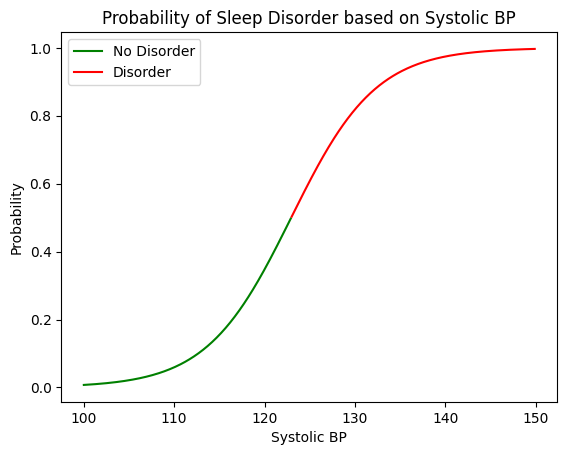

In [42]:
plt.plot(cs1_df.loc[g_index1]["Systolic"],probs1.loc[g_index1], c='g', label="No Disorder")
plt.plot(cs1_df.loc[r_index1]["Systolic"],probs1.loc[r_index1], c='r', label="Disorder")
plt.legend()
plt.xlabel("Systolic BP")
plt.ylabel("Probability")
plt.title("Probability of Sleep Disorder based on Systolic BP")

In [43]:
# Case study 2
"""
Creating a dummy dataframe to evaluate the change in probabilities of having a sleep disorder by ranging stress levels.
We consider fixed values for the rest of the features.
"""
n = 500 # number of entries in case study

stress_min = 0
stress_max = 10
stresscs2 = []         # range of systolic bp
for x in range(0,n):
  val = stress_min + (stress_max-stress_min)*x/n
  stresscs2.append(val)

age = 40 # fixed age
activity = 5 # fixed activity level
systoliccs2 = 125 # fixed systolic level
heartrate = 75 # fixed heart rate
gender = 0 # fixed gender
weight = 1 # fixed weight

cs2a_df = pd.DataFrame()
cs2a_df["Age"]=np.ones(n)*age
cs2a_df["Stress Level"]=pd.DataFrame(stresscs2)
cs2a_df["Physical Activity Level"]=np.ones(n)*activity
cs2a_df["Systolic"] = np.ones(n)*systoliccs2
cs2a_df["Heart Rate"]=np.ones(n)*heartrate
cs2a_df["Gender"]=np.ones(n)*gender
cs2a_df["Weight"]=np.ones(n)*weight

In [44]:
scaled_cs2a = scaler.transform(cs2a_df)

In [45]:
kx2a = scaled_cs2a*(modelsd.coef_)
kx_b2a = kx2a.sum(axis=1)+modelsd.intercept_
probs2a = pd.Series(e**kx_b2a/(1+e**kx_b2a))

In [46]:
preds2a = pd.Series(modelsd.predict(scaled_cs2a))

In [47]:
# Case Study 2b: Changing weight to overweight
cs2b_df = cs2a_df.copy()
cs2b_df["Weight"]=cs2b_df["Weight"]*0

scaled_cs2b = scaler.transform(cs2b_df)
kx2b = scaled_cs2b*(modelsd.coef_)
kx_b2b = kx2b.sum(axis=1)+modelsd.intercept_
probs2b = pd.Series(e**kx_b2b/(1+e**kx_b2b))
preds2b = pd.Series(modelsd.predict(scaled_cs2b))

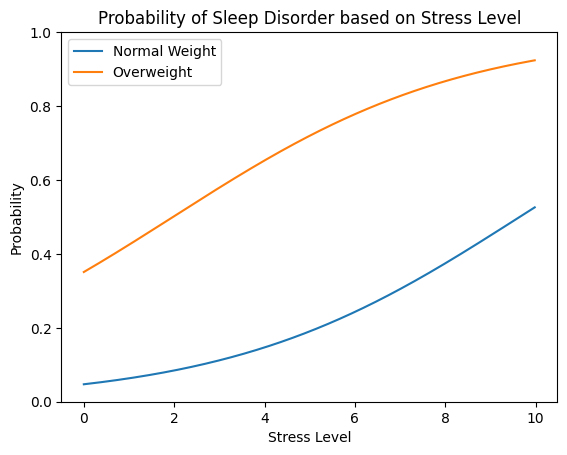

In [48]:
plt.figure()
plt.plot(cs2a_df["Stress Level"],probs2a,label="Normal Weight")
plt.plot(cs2b_df["Stress Level"],probs2b,label="Overweight")
plt.legend()
plt.xlabel("Stress Level")
plt.ylabel("Probability")
plt.ylim(0,1)
plt.title("Probability of Sleep Disorder based on Stress Level")
plt.show()